In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import plotly.express as px
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore') 



In [2]:
#Uploading the Train data
df_train = pd.read_csv("Data/Train.csv")

In [3]:
df_train.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [4]:
# Column Description

df_vd = pd.read_csv("Data/VariableDefinitions.csv")
df_vd

,Column,Description
0,age,Age Of Individual
1,gender,Gender
2,education,Education
3,class,Class Of Worker
4,education_institute,Enrolled Educational Institution in last week
5,marital_status,Marital_Status
6,race,Race
7,is_hispanic,Hispanic Origin
8,employment_commitment,Full Or Part Time Employment Stat
9,unemployment_reason,Reason For Unemployment


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [6]:
df_train.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

# Dealing with NAN values 

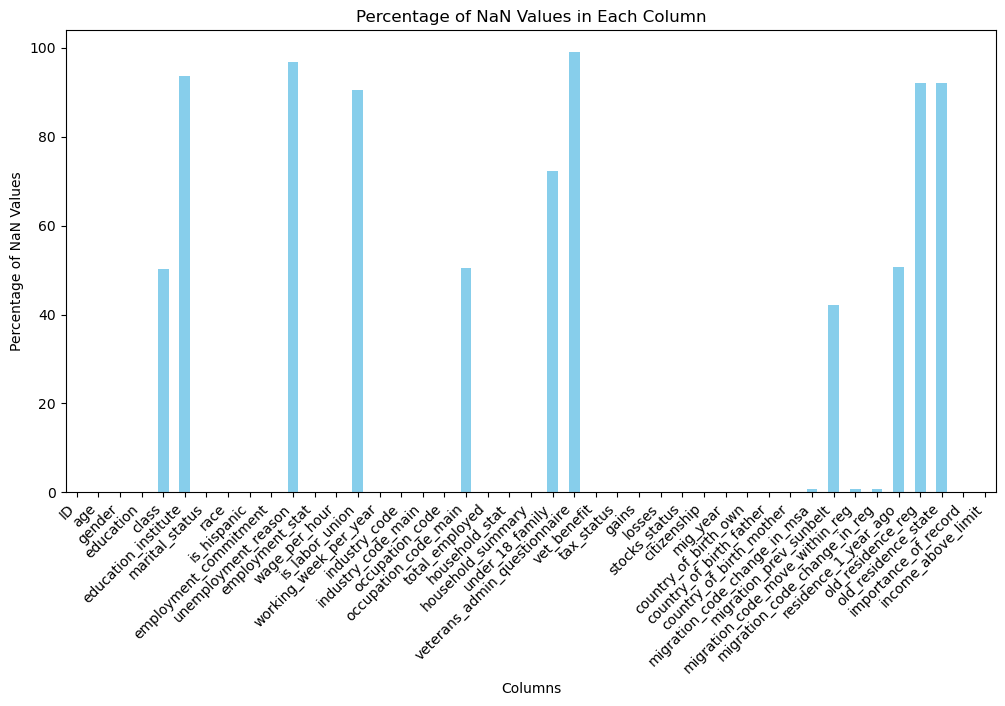

In [7]:
# visualizing NaN percentages
nan_percentage = (df_train.isnull().mean() * 100).round(2)

# visualizing NaN percentages
plt.figure(figsize=(12, 6))
nan_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()

## Insight from our NAN visualization

Analysis of our virtualization data reveals that a significant number of columns contain numerous NaN values. Upon closer examination through our chart, we've identified specific columns exhibiting an 70% prevalence of NaN values. These problematic columns include education_institute, is_labor_union, unemployment_reason, veterans_admin_questionnaire, old_residence_reg, and old_residence_state. It is imperative that we proceed by eliminating these columns.

In [8]:
# Droping columns with more than 70% NAN 
nan_cols_drop  = []
for cols in df_train.columns:
    if df_train[cols].isna().sum()/df_train.shape[0] >0.7:
        nan_cols_drop.append(cols)
        
df_train  = df_train.drop(nan_cols_drop,axis=1)

In [9]:
# Droping other NaN Columns

df_train.drop(columns=['ID','residence_1_year_ago','migration_code_change_in_reg','migration_code_move_within_reg',
                      'migration_prev_sunbelt','migration_code_change_in_msa','country_of_birth_own','country_of_birth_father',
                       'country_of_birth_mother'], inplace=True)


In [10]:
df_train.isnull().sum()

age                           0
gender                        0
education                     0
class                    105245
marital_status                0
race                          0
is_hispanic                   0
employment_commitment         0
employment_stat               0
wage_per_hour                 0
working_week_per_year         0
industry_code                 0
industry_code_main            0
occupation_code               0
occupation_code_main     105694
total_employed                0
household_stat                0
household_summary             0
vet_benefit                   0
tax_status                    0
gains                         0
losses                        0
stocks_status                 0
citizenship                   0
mig_year                      0
importance_of_record          0
income_above_limit            0
dtype: int64

In [11]:
# unique values in column class  
selected_column = 'class' 

unique_values_counts = df_train[selected_column].value_counts()
unique_values_counts

class
 Private                           75617
 Self-employed-not incorporated     8957
 Local government                   8093
 State government                   4480
 Self-employed-incorporated         3444
 Federal government                 3047
 Never worked                        449
 Without pay                         167
Name: count, dtype: int64

In [12]:
nan_class = df_train['class'].isnull().sum()
nan_class

105245

In [13]:
class_column = df_train[df_train['class'].isnull()]
class_column

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
0,79,Female,High school graduate,NaN,Widowed,White,All other,Not in labor force,0,0,...,Householder,2,Head of household,0,0,292,Native,95,1779.74,Below limit
1,65,Female,High school graduate,NaN,Widowed,White,All other,Children or Armed Forces,0,0,...,Householder,2,Single,0,0,0,Native,94,2366.75,Below limit
3,2,Female,Children,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,1380.27,Below limit
4,70,Male,High school graduate,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,1580.79,Below limit
8,73,Female,7th and 8th grade,NaN,Married-civilian spouse present,Black,All other,Not in labor force,0,0,...,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,1267.30,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209488,76,Female,Some college but no degree,NaN,Never married,White,All other,Not in labor force,0,0,...,Householder,2,Single,0,0,2744,Native,95,2570.89,Below limit
209492,44,Female,1st 2nd 3rd or 4th grade,NaN,Married-civilian spouse present,White,Mexican (Mexicano),Not in labor force,0,0,...,Spouse of householder,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,1142.78,Below limit
209494,16,Female,7th and 8th grade,NaN,Never married,White,All other,Not in labor force,0,0,...,Child under 18 never married,2,Nonfiler,0,0,0,Native,95,2170.60,Below limit
209495,78,Male,Bachelors degree(BA AB BS),NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,Householder,2,Joint both 65+,0,0,71,Native,95,1029.57,Below limit


Upon examining the NaN values in the 'class' column and cross-referencing with the 'age' column, a pattern emerges. It seems that these NaN entries correspond to individuals either below the working age or retired, typically aged 60 and above. In light of this observation, we can confidently classify these NaN values in the 'class' column as 'unemployed'.

In [14]:
# change all NAN in class to Unemployed
df_train['class'].fillna('Unemployed', inplace=True)

### Cleaning NaN in occupation_code_main Column

In [15]:
nan_ocm= df_train['occupation_code_main'].isnull().sum()
nan_ocm

105694

In [16]:
nan_ocm_df = df_train[df_train['occupation_code_main'].isnull()]
nan_ocm_df.head()


,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit
0,79,Female,High school graduate,Unemployed,Widowed,White,All other,Not in labor force,0,0,...,Householder,2,Head of household,0,0,292,Native,95,1779.74,Below limit
1,65,Female,High school graduate,Unemployed,Widowed,White,All other,Children or Armed Forces,0,0,...,Householder,2,Single,0,0,0,Native,94,2366.75,Below limit
3,2,Female,Children,Unemployed,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,1380.27,Below limit
4,70,Male,High school graduate,Unemployed,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,1580.79,Below limit
8,73,Female,7th and 8th grade,Unemployed,Married-civilian spouse present,Black,All other,Not in labor force,0,0,...,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,1267.30,Below limit


In [17]:
# Droping all rows with NAN 
df_train = df_train.dropna(subset=['occupation_code_main'])

In [18]:
df_train.isnull().sum()

age                      0
gender                   0
education                0
class                    0
marital_status           0
race                     0
is_hispanic              0
employment_commitment    0
employment_stat          0
wage_per_hour            0
working_week_per_year    0
industry_code            0
industry_code_main       0
occupation_code          0
occupation_code_main     0
total_employed           0
household_stat           0
household_summary        0
vet_benefit              0
tax_status               0
gains                    0
losses                   0
stocks_status            0
citizenship              0
mig_year                 0
importance_of_record     0
income_above_limit       0
dtype: int64

##### Done Cleaning with all NAN values 

### Now lets do more Cleaning.

#### Now lets visualize our data for more insight 

Unique Values in household_stat is too large to plot




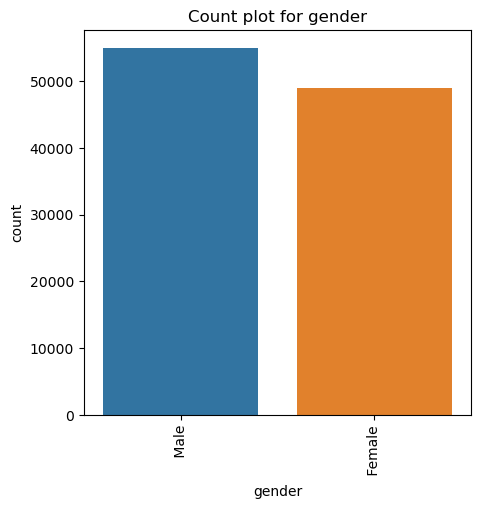

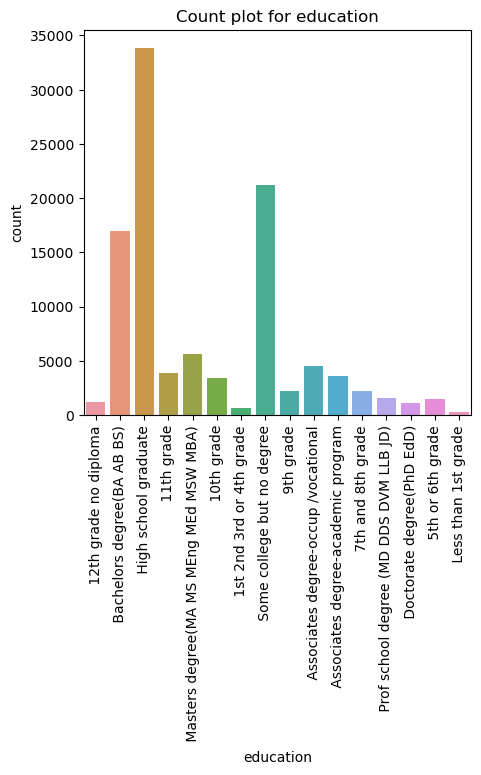

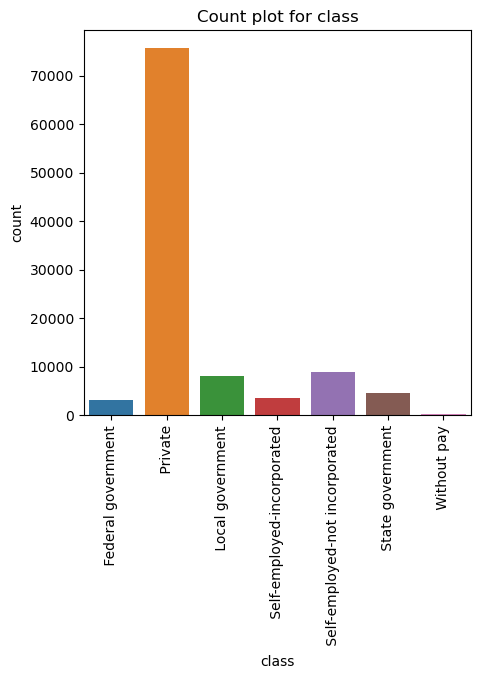

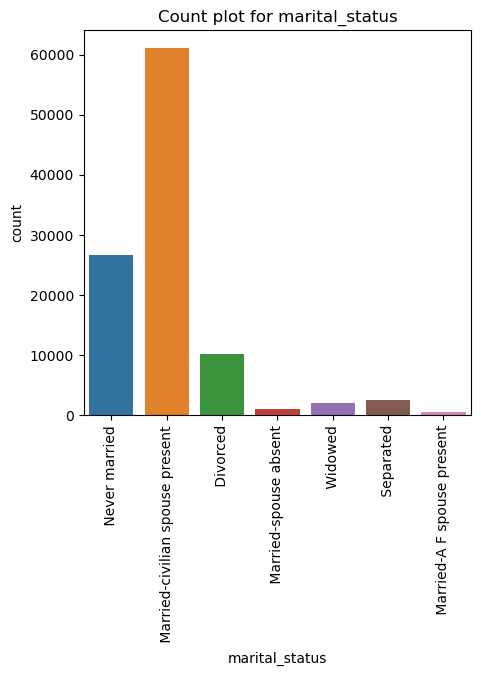

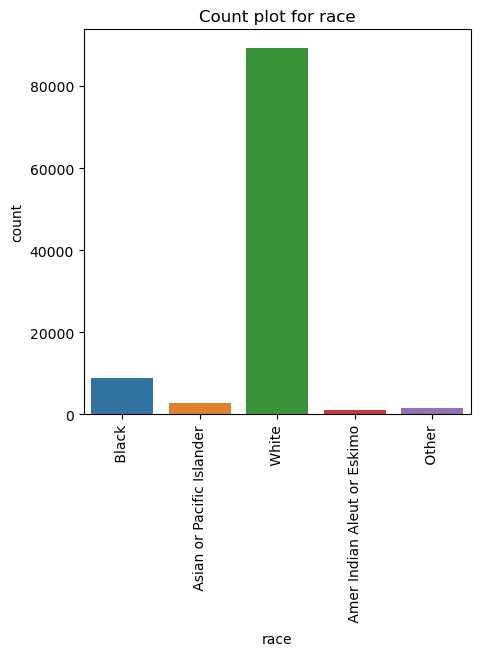

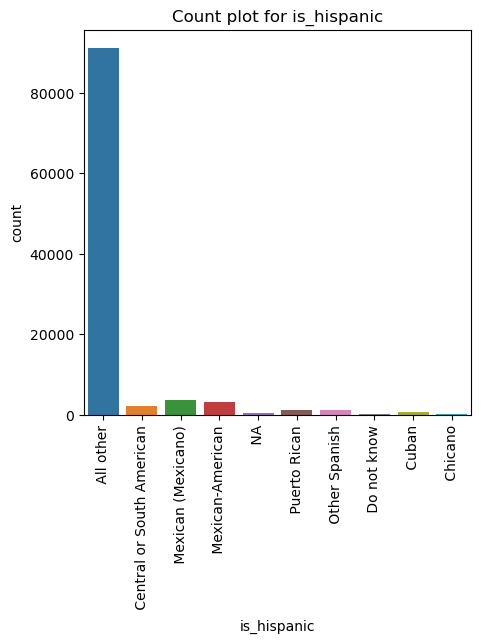

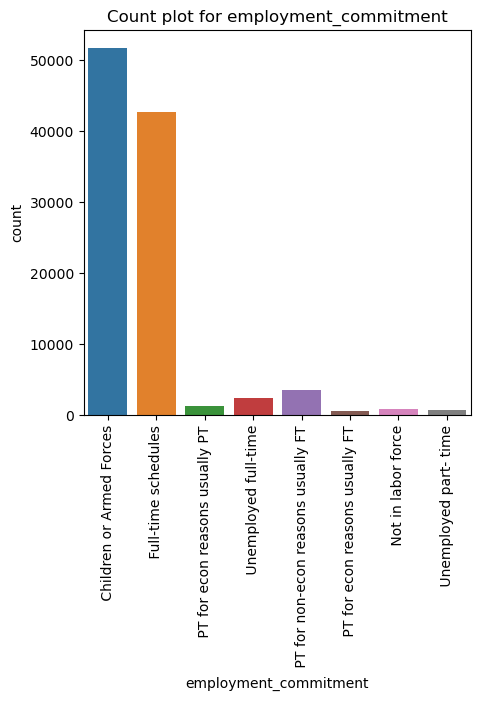

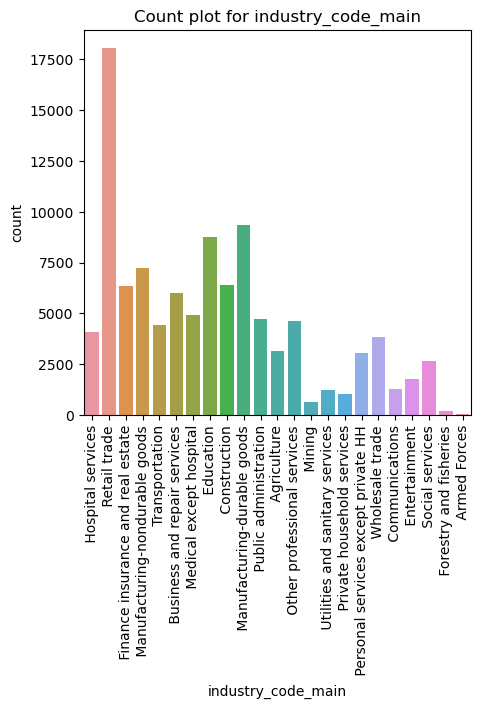

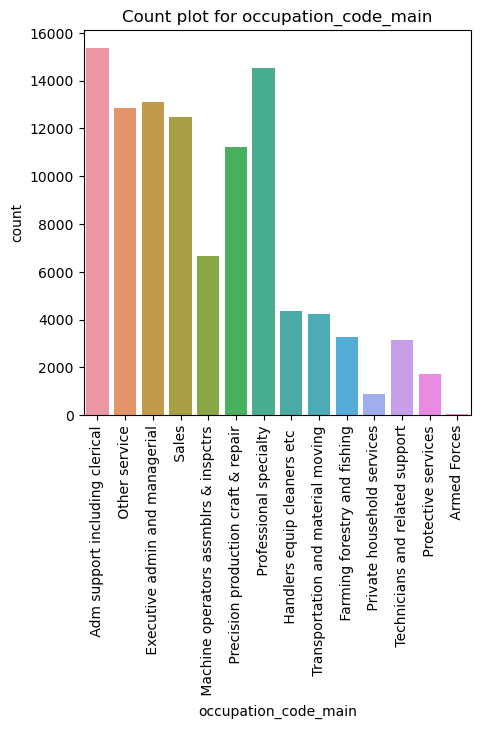

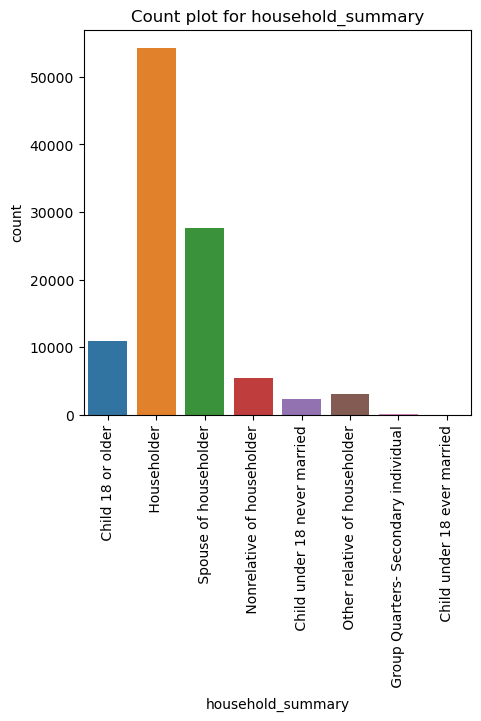

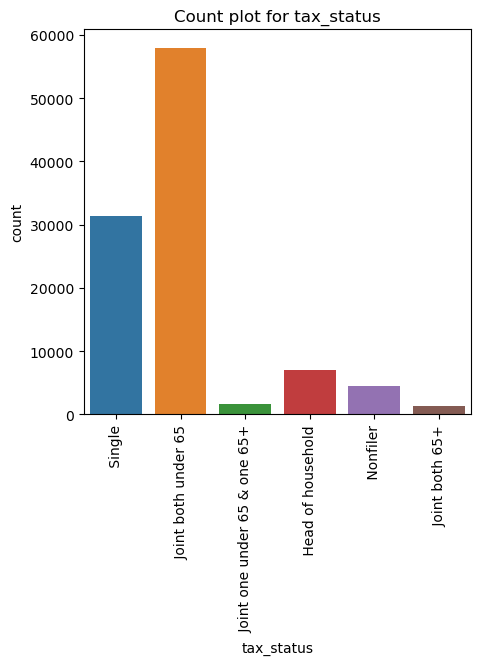

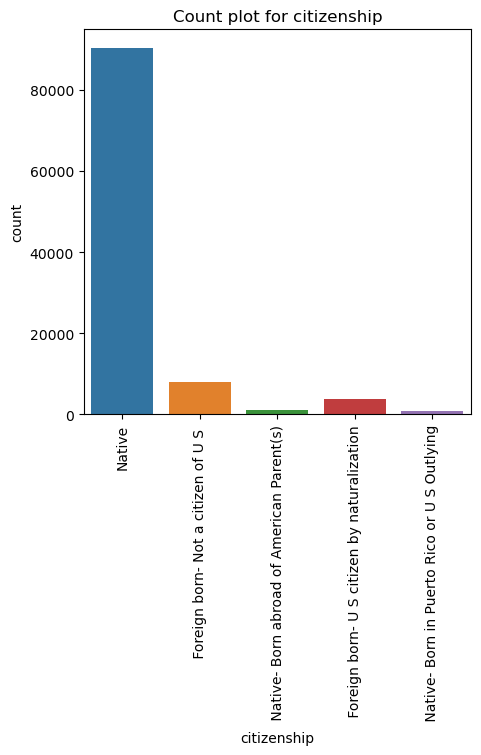

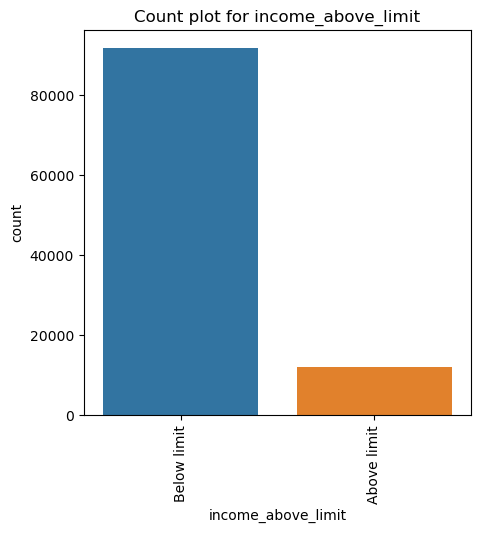

In [19]:
import datasist as ds
ds.visualizations.countplot(df_train)

##### Categorize the Education Column 

In [20]:
selected_column = 'education' 

# unique values in Education
unique_values_counts = df_train[selected_column].value_counts()
unique_values_counts

education
 High school graduate                      33815
 Some college but no degree                21239
 Bachelors degree(BA AB BS)                17000
 Masters degree(MA MS MEng MEd MSW MBA)     5637
 Associates degree-occup /vocational        4505
 11th grade                                 3830
 Associates degree-academic program         3570
 10th grade                                 3413
 9th grade                                  2229
 7th and 8th grade                          2203
 Prof school degree (MD DDS DVM LLB JD)     1583
 5th or 6th grade                           1519
 12th grade no diploma                      1242
 Doctorate degree(PhD EdD)                  1102
 1st 2nd 3rd or 4th grade                    679
 Less than 1st grade                         239
Name: count, dtype: int64

In [21]:
# Mapping for education categories
education_mapping = {
    ' Less than 1st grade': 'Elementary',
    ' 1st 2nd 3rd or 4th grade': 'Elementary',
    ' 5th or 6th grade': 'Elementary',
    ' 7th and 8th grade': 'Middle School',
    ' 9th grade': 'High School',
    ' 10th grade': 'High School',
    ' 11th grade': 'High School',
    ' 12th grade no diploma': 'High School',
    ' High school graduate': 'High School',
    ' Some college but no degree': 'Some College',
    ' Associates degree-occup /vocational': 'Associates Degree',
    ' Associates degree-academic program': 'Associates Degree',
    ' Bachelors degree(BA AB BS)': 'Bachelors',
    ' Masters degree(MA MS MEng MEd MSW MBA)': 'Masters',
    ' Prof school degree (MD DDS DVM LLB JD)': 'Professional',
    ' Doctorate degree(PhD EdD)': 'Doctorate',
    ' Children': 'Other'
}

# new column 'education_categories' 
df_train['education_categories'] = df_train['education'].map(education_mapping)



In [22]:
# Drop education column 

df_train.drop(columns= ['education'], inplace = True)

### Categorize the age Column 

This project is about income earnings so its only fair to drop all persons between age 0 to 17. the working age is 18 years 

In [23]:
df_train = df_train[(df_train['age'] < 0) | (df_train['age'] > 17)]

We group the ages into ranges to help us with our analysis. 

Age: '18-24'
Age: '25-44'
Age: '45-59'
Age: '60 and above'

In [24]:
# Categorize the ages

bins = [17, 24, 44, 59, float('inf')]
labels = ['18-24', '25-44', '45-59', '60 and above']

# New column 'age_group' based on age ranges
df_train['age_group'] = pd.cut(df_train['age'], bins=bins, labels=labels, right=False)


In [25]:
#  Drop age column
df_train.drop(columns= ['age'], inplace = True)

In [26]:
df_train.head()

,gender,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,...,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit,education_categories,age_group
2,Male,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,15,41,...,Single,0,0,0,Native,94,1693.42,Below limit,High School,18-24
5,Male,Private,Married-civilian spouse present,Asian or Pacific Islander,All other,Children or Armed Forces,0,825,52,33,...,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,94,4438.27,Below limit,Bachelors,45-59
6,Male,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,33,...,Joint both under 65,0,0,0,Native,95,1401.23,Below limit,High School,45-59
7,Female,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,35,...,Joint both under 65,0,0,0,Native,95,661.07,Below limit,High School,18-24
9,Female,Private,Married-civilian spouse present,Black,All other,Full-time schedules,0,0,48,22,...,Joint both under 65,0,0,0,Native,95,3091.18,Below limit,High School,18-24


# Cleaning Test data 

In [27]:
#Uploading the Test data
df_test = pd.read_csv("Data/Test.csv")

df_test.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


In [28]:
#Uploading the Test data
df_test = pd.read_csv("Data/Test.csv")

df_test.head()


,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


In [29]:
# Column Description

df_vd = pd.read_csv("Data/VariableDefinitions.csv")
df_vd

,Column,Description
0,age,Age Of Individual
1,gender,Gender
2,education,Education
3,class,Class Of Worker
4,education_institute,Enrolled Educational Institution in last week
5,marital_status,Marital_Status
6,race,Race
7,is_hispanic,Hispanic Origin
8,employment_commitment,Full Or Part Time Employment Stat
9,unemployment_reason,Reason For Unemployment


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89786 entries, 0 to 89785
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              89786 non-null  object 
 1   age                             89786 non-null  int64  
 2   gender                          89786 non-null  object 
 3   education                       89786 non-null  object 
 4   class                           44707 non-null  object 
 5   education_institute             5616 non-null   object 
 6   marital_status                  89786 non-null  object 
 7   race                            89786 non-null  object 
 8   is_hispanic                     89786 non-null  object 
 9   employment_commitment           89786 non-null  object 
 10  unemployment_reason             2680 non-null   object 
 11  employment_stat                 89786 non-null  int64  
 12  wage_per_hour                   

In [31]:
df_test.isnull().sum()

ID                                    0
age                                   0
gender                                0
education                             0
class                             45079
education_institute               84170
marital_status                        0
race                                  0
is_hispanic                           0
employment_commitment                 0
unemployment_reason               87106
employment_stat                       0
wage_per_hour                         0
is_labor_union                    81322
working_week_per_year                 0
industry_code                         0
industry_code_main                    0
occupation_code                       0
occupation_code_main              45273
total_employed                        0
household_stat                        0
household_summary                     0
under_18_family                   64972
veterans_admin_questionnaire      88859
vet_benefit                           0


# Dealing with NAN values

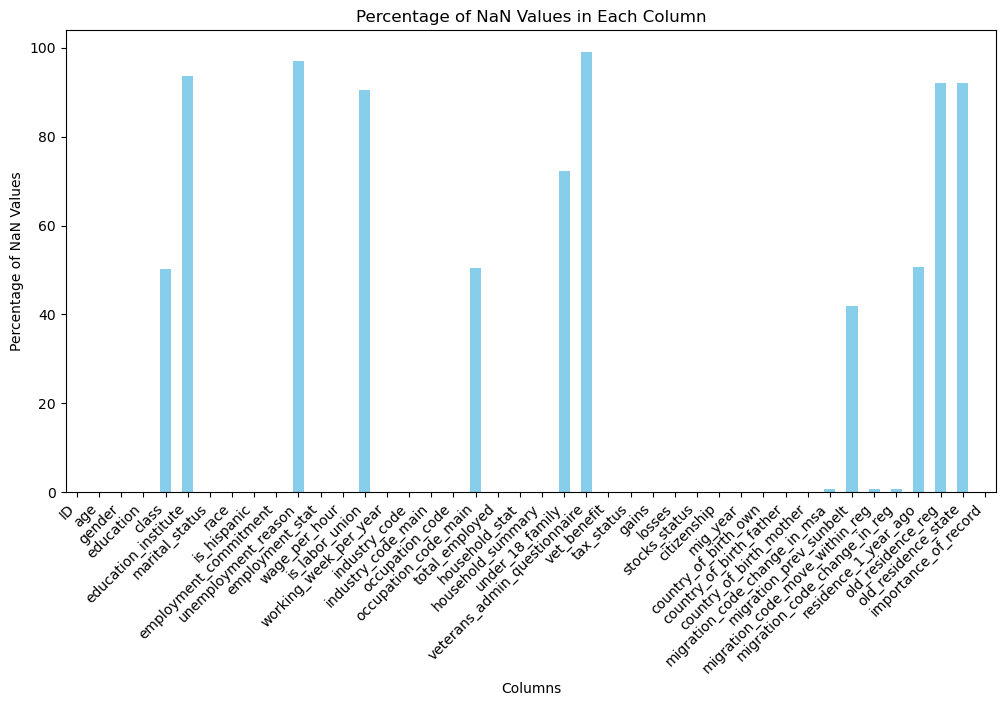

In [32]:
# visualizing NaN percentages
nan_percentage = (df_test.isnull().mean() * 100).round(2)

# visualizing NaN percentages
plt.figure(figsize=(12, 6))
nan_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()


## Insight from our NAN visualization

Analysis of our virtualization data reveals that a significant number of columns contain numerous NaN values. Upon closer examination through our chart, we've identified specific columns exhibiting an 70% prevalence of NaN values. These problematic columns include education_institute, is_labor_union, unemployment_reason, veterans_admin_questionnaire, old_residence_reg, and old_residence_state. It is imperative that we proceed by eliminating these columns.

In [33]:
# Droping columns with more than 70% NAN 
nan_cols_drop  = []
for cols in df_test.columns:
    if df_test[cols].isna().sum()/df_test.shape[0] >0.7:
        nan_cols_drop.append(cols)
        
df_test  = df_test.drop(nan_cols_drop,axis=1)

In [34]:
# Droping other NaN Columns

df_test.drop(columns=['ID','residence_1_year_ago','migration_code_change_in_reg','migration_code_move_within_reg',
                      'migration_prev_sunbelt','migration_code_change_in_msa','country_of_birth_own','country_of_birth_father',
                       'country_of_birth_mother'], inplace=True)


In [35]:
df_test.isnull().sum()

age                          0
gender                       0
education                    0
class                    45079
marital_status               0
race                         0
is_hispanic                  0
employment_commitment        0
employment_stat              0
wage_per_hour                0
working_week_per_year        0
industry_code                0
industry_code_main           0
occupation_code              0
occupation_code_main     45273
total_employed               0
household_stat               0
household_summary            0
vet_benefit                  0
tax_status                   0
gains                        0
losses                       0
stocks_status                0
citizenship                  0
mig_year                     0
importance_of_record         0
dtype: int64

In [36]:
# unique values in column class  
selected_column = 'class' 

unique_values_counts = df_test[selected_column].value_counts()
unique_values_counts


class
 Private                           32482
 Self-employed-not incorporated     3768
 Local government                   3524
 State government                   1914
 Self-employed-incorporated         1469
 Federal government                 1283
 Never worked                        194
 Without pay                          73
Name: count, dtype: int64

In [37]:
nan_class = df_test['class'].isnull().sum()
nan_class

45079

In [38]:

class_column = df_test[df_test['class'].isnull()]
class_column

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
3,16,Female,9th grade,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,2,Single,0,0,0,Native,94,1391.44
4,16,Male,9th grade,NaN,Never married,White,All other,Not in labor force,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,2,Nonfiler,0,0,0,Native,95,1933.18
5,0,Male,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,2193.86
6,9,Male,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,1117.13
7,10,Male,Children,NaN,Never married,Other,Puerto Rican,Children or Armed Forces,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native- Born in Puerto Rico or U S Outlying,95,644.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89777,65,Male,7th and 8th grade,NaN,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,Householder,Householder,2,Joint one under 65 & one 65+,0,419,0,Native,95,2461.72
89778,8,Female,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,991.67
89779,67,Male,High school graduate,NaN,Divorced,White,All other,Not in labor force,0,0,...,Secondary individual,Nonrelative of householder,2,Nonfiler,0,0,0,Native,95,806.37
89781,5,Male,Children,NaN,Never married,White,All other,Children or Armed Forces,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,938.83


Upon examining the NaN values in the 'class' column and cross-referencing with the 'age' column, a pattern emerges. It seems that these NaN entries correspond to individuals either below the working age or retired, typically aged 60 and above. In light of this observation, we can confidently classify these NaN values in the 'class' column as 'unemployed'.


In [39]:
# change all NAN in class to Unemployed
df_test['class'].fillna('Unemployed', inplace=True)

### Cleaning NaN in occupation_code_main Column

In [40]:
nan_ocm= df_test['occupation_code_main'].isnull().sum()
nan_ocm

45273

In [41]:
nan_ocm_df = df_test[df_test['occupation_code_main'].isnull()]
nan_ocm_df.head()

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record
3,16,Female,9th grade,Unemployed,Never married,White,All other,Children or Armed Forces,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,2,Single,0,0,0,Native,94,1391.44
4,16,Male,9th grade,Unemployed,Never married,White,All other,Not in labor force,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,2,Nonfiler,0,0,0,Native,95,1933.18
5,0,Male,Children,Unemployed,Never married,White,All other,Children or Armed Forces,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,2193.86
6,9,Male,Children,Unemployed,Never married,White,All other,Children or Armed Forces,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,95,1117.13
7,10,Male,Children,Unemployed,Never married,Other,Puerto Rican,Children or Armed Forces,0,0,...,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native- Born in Puerto Rico or U S Outlying,95,644.83


In [42]:
# Droping all rows with NAN 
df_test = df_test.dropna(subset=['occupation_code_main'])

In [43]:
df_test.isnull().sum()

age                      0
gender                   0
education                0
class                    0
marital_status           0
race                     0
is_hispanic              0
employment_commitment    0
employment_stat          0
wage_per_hour            0
working_week_per_year    0
industry_code            0
industry_code_main       0
occupation_code          0
occupation_code_main     0
total_employed           0
household_stat           0
household_summary        0
vet_benefit              0
tax_status               0
gains                    0
losses                   0
stocks_status            0
citizenship              0
mig_year                 0
importance_of_record     0
dtype: int64

##### Done Cleaning with all NAN values 

### Now lets do more Cleaning.

#### Now lets visualize our data for more insight

Unique Values in household_stat is too large to plot




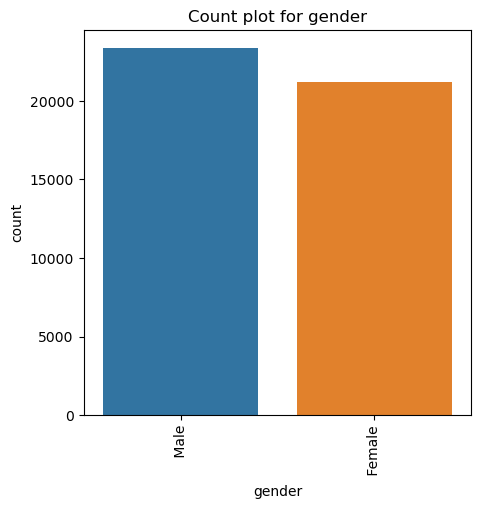

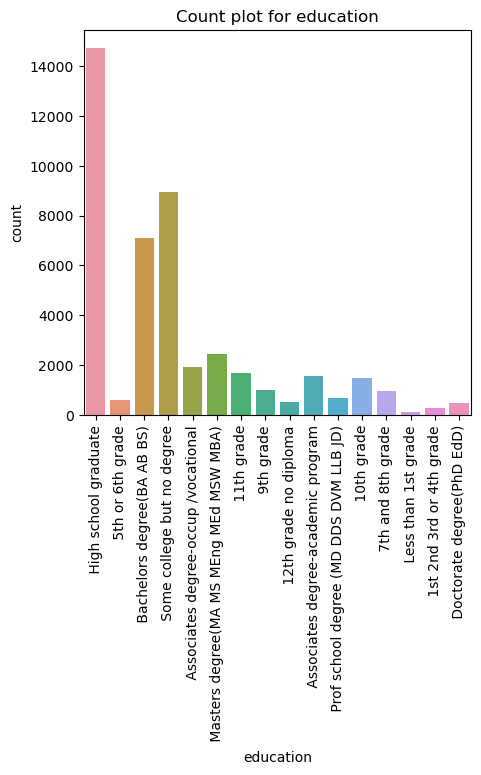

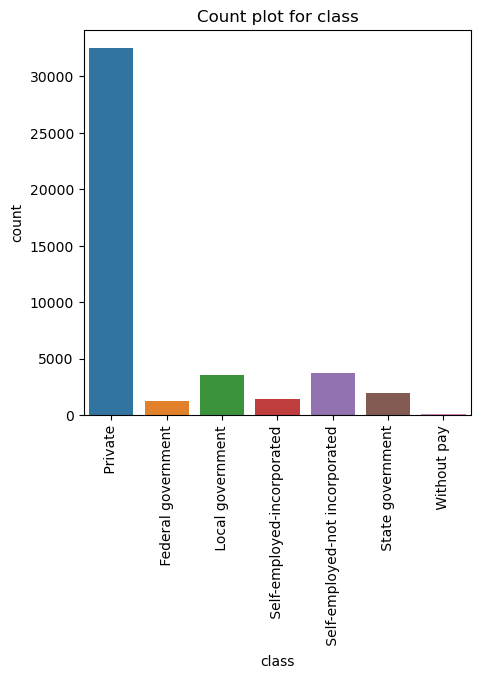

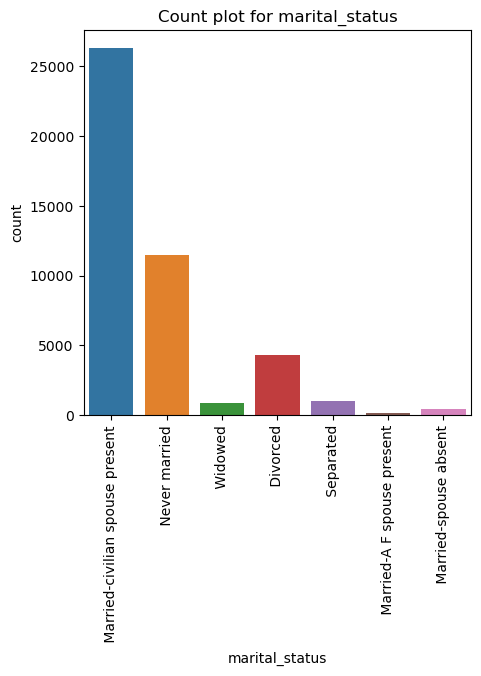

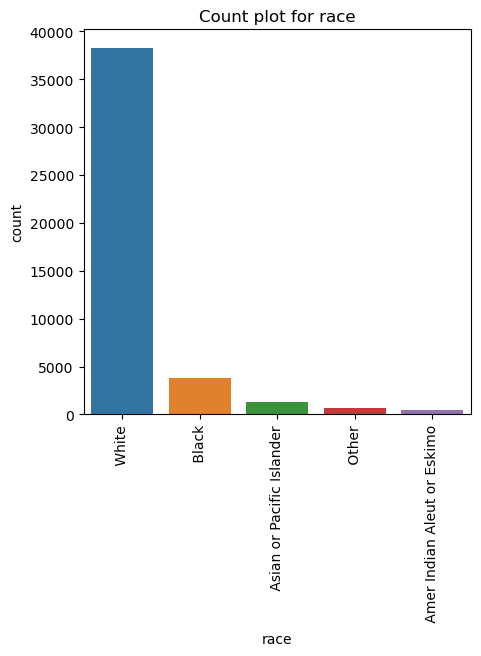

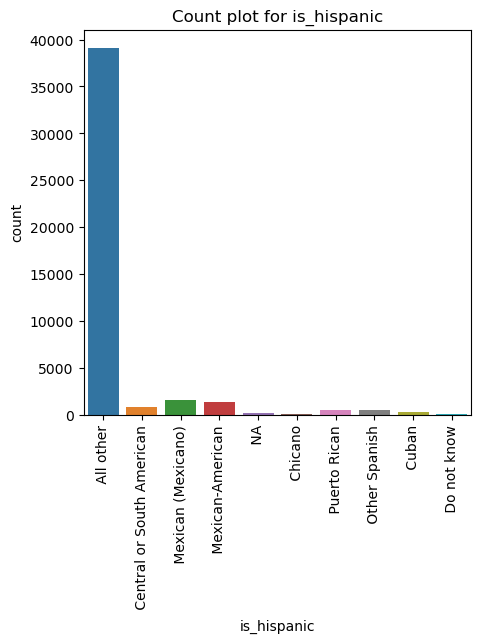

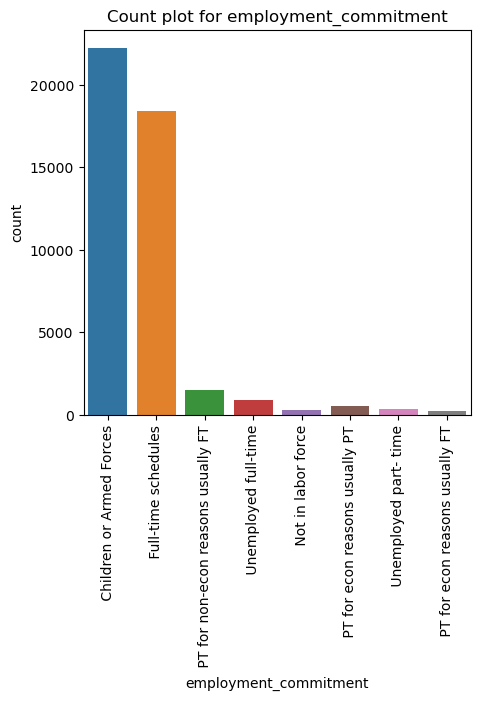

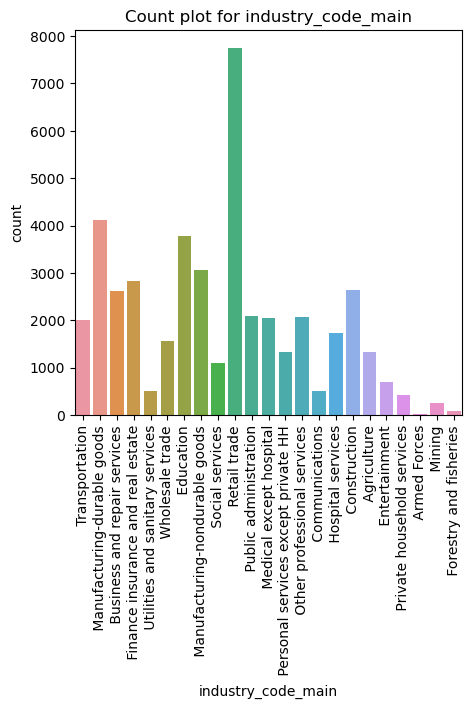

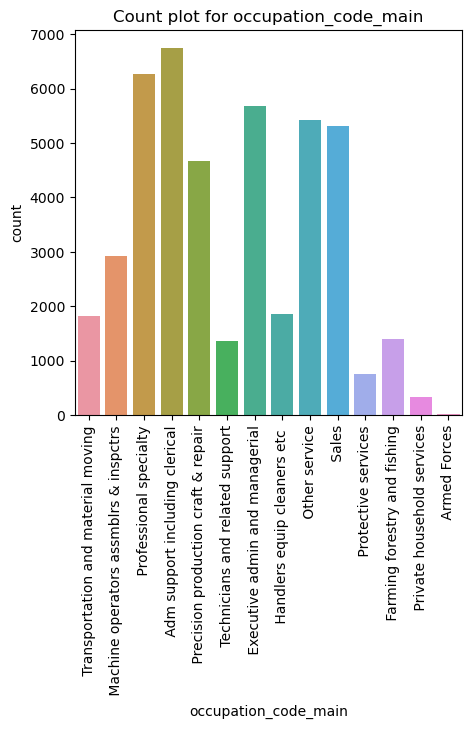

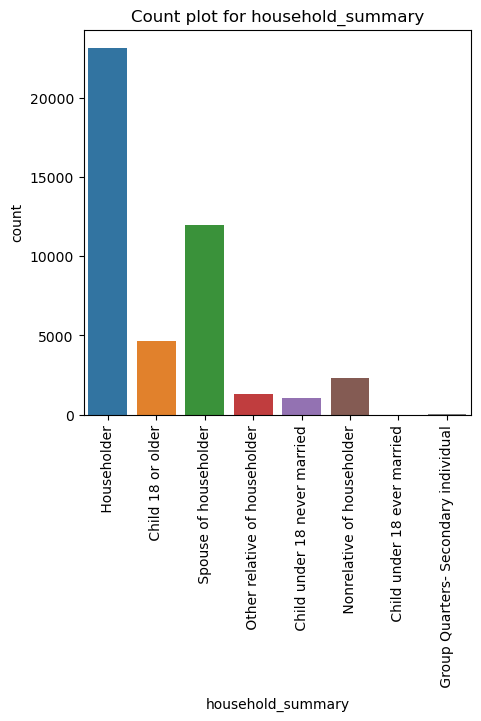

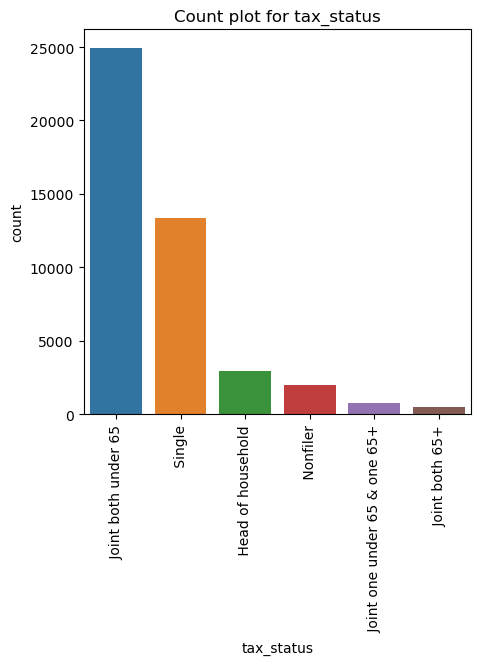

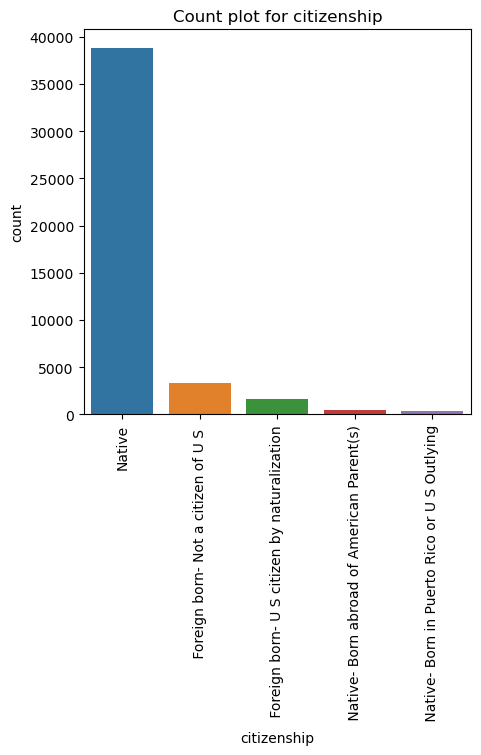

In [44]:
ds.visualizations.countplot(df_test)

##### Categorize the Education Column

In [45]:
selected_column = 'education' 

# unique values in Education
unique_values_counts = df_test[selected_column].value_counts()
unique_values_counts

education
 High school graduate                      14709
 Some college but no degree                 8961
 Bachelors degree(BA AB BS)                 7113
 Masters degree(MA MS MEng MEd MSW MBA)     2455
 Associates degree-occup /vocational        1922
 11th grade                                 1694
 Associates degree-academic program         1544
 10th grade                                 1471
 9th grade                                   988
 7th and 8th grade                           953
 Prof school degree (MD DDS DVM LLB JD)      691
 5th or 6th grade                            608
 12th grade no diploma                       530
 Doctorate degree(PhD EdD)                   472
 1st 2nd 3rd or 4th grade                    294
 Less than 1st grade                         108
Name: count, dtype: int64

In [46]:
# Mapping for education categories
education_mapping = {
    ' Less than 1st grade': 'Elementary',
    ' 1st 2nd 3rd or 4th grade': 'Elementary',
    ' 5th or 6th grade': 'Elementary',
    ' 7th and 8th grade': 'Middle School',
    ' 9th grade': 'High School',
    ' 10th grade': 'High School',
    ' 11th grade': 'High School',
    ' 12th grade no diploma': 'High School',
    ' High school graduate': 'High School',
    ' Some college but no degree': 'Some College',
    ' Associates degree-occup /vocational': 'Associates Degree',
    ' Associates degree-academic program': 'Associates Degree',
    ' Bachelors degree(BA AB BS)': 'Bachelors',
    ' Masters degree(MA MS MEng MEd MSW MBA)': 'Masters',
    ' Prof school degree (MD DDS DVM LLB JD)': 'Professional',
    ' Doctorate degree(PhD EdD)': 'Doctorate',
    ' Children': 'Other'
}

# new column 'education_categories' 
df_test['education_categories'] = df_test['education'].map(education_mapping)

In [47]:

# Drop education column 

df_test.drop(columns= ['education'], inplace = True)

### Categorize the age Column 
This project is about income earnings so its only fair to drop all persons between age 0 to 17. the working age is 18 years

In [48]:
df_test = df_test[(df_test['age'] < 0) | (df_test['age'] > 17)]

We group the ages into ranges to help us with our analysis. 

Age: '18-24'
Age: '25-44'
Age: '45-59'
Age: '60 and above'

In [49]:
# Categorize the ages

bins = [17, 24, 44, 59, float('inf')]
labels = ['18-24', '25-44', '45-59', '60 and above']

# New column 'age_group' based on age ranges
df_test['age_group'] = pd.cut(df_test['age'], bins=bins, labels=labels, right=False)

In [50]:
#  Drop age column
df_test.drop(columns= ['age'], inplace = True)

In [51]:
df_test.head()

,gender,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,...,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,education_categories,age_group
0,Male,Private,Married-civilian spouse present,White,All other,Children or Armed Forces,0,600,46,29,...,2,Joint both under 65,0,0,0,Native,94,3388.96,High School,45-59
1,Male,Private,Married-civilian spouse present,White,Central or South American,Full-time schedules,0,0,52,5,...,2,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,95,1177.55,Elementary,45-59
2,Male,Private,Married-civilian spouse present,White,All other,Full-time schedules,1,0,44,37,...,2,Joint both under 65,15024,0,500,Native,95,4898.55,Bachelors,25-44
9,Female,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,34,...,2,Joint both under 65,0,0,0,Native,95,1517.17,High School,45-59
10,Male,Private,Married-civilian spouse present,White,All other,Full-time schedules,2,2000,52,31,...,2,Joint both under 65,0,0,0,Native,95,3860.41,Some College,25-44


In [52]:
df_train.head()

,gender,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,...,tax_status,gains,losses,stocks_status,citizenship,mig_year,importance_of_record,income_above_limit,education_categories,age_group
2,Male,Federal government,Never married,Black,All other,Children or Armed Forces,0,500,15,41,...,Single,0,0,0,Native,94,1693.42,Below limit,High School,18-24
5,Male,Private,Married-civilian spouse present,Asian or Pacific Islander,All other,Children or Armed Forces,0,825,52,33,...,Joint both under 65,0,0,0,Foreign born- Not a citizen of U S,94,4438.27,Below limit,Bachelors,45-59
6,Male,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,33,...,Joint both under 65,0,0,0,Native,95,1401.23,Below limit,High School,45-59
7,Female,Private,Married-civilian spouse present,White,All other,Full-time schedules,0,0,52,35,...,Joint both under 65,0,0,0,Native,95,661.07,Below limit,High School,18-24
9,Female,Private,Married-civilian spouse present,Black,All other,Full-time schedules,0,0,48,22,...,Joint both under 65,0,0,0,Native,95,3091.18,Below limit,High School,18-24
